In [4]:
import tensorflow as tf
import sklearn
import shutil
import zipfile,os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image


In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-07-26 17:09:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.68MB/s    in 49s     

2020-07-26 17:10:49 (6.31 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [8]:
base_directory = '/tmp/rockpaperscissors'
train_directory = os.path.join(base_directory,'train')
val_directory = os.path.join(base_directory,'val')

paper_directory = os.path.join(base_directory,'paper')
rock_directory = os.path.join(base_directory,'rock')
scissors_directory = os.path.join(base_directory,'scissors')


In [ ]:
train_directory

'/tmp/rockpaperscissors/train'

In [ ]:
val_directory

'/tmp/rockpaperscissors/val'

In [ ]:
paper_directory

'/tmp/rockpaperscissors/paper'

In [ ]:
rock_directory

'/tmp/rockpaperscissors/rock'

In [ ]:
scissors_directory

'/tmp/rockpaperscissors/scissors'

In [ ]:
os.mkdir(train_directory)
os.mkdir(val_directory)

In [ ]:
# delete directory
shutil.rmtree(val_directory)

In [9]:
paper_files = os.listdir(paper_directory)
rock_files = os.listdir(rock_directory)
scissors_files = os.listdir(scissors_directory)

print('paper sum : ' , len(paper_files))
print('rock sum : ' , len(rock_files))
print('scissors sum : ' , len(scissors_files))

paper sum :  712
rock sum :  726
scissors sum :  750


In [ ]:
train_paper , val_paper = train_test_split(paper_files , test_size = 0.4)
train_rock , val_rock = train_test_split(rock_files , test_size = 0.4)
train_scissors , val_scissors = train_test_split(scissors_files , test_size = 0.4)

print(len(train_paper) , " " , len(val_paper))
print(len(train_rock) , " " , len(val_rock))
print(len(train_scissors) , " " , len(val_scissors))

total_train = len(train_paper) + len(train_rock) + len(train_scissors)
total_val = len(val_paper) + len(val_rock) + len(val_scissors)

print(total_train , " " , total_val)

427   285
435   291
450   300
1312   876


In [ ]:
paper_directory_train = os.path.join(train_directory, 'paper')
paper_directory_val = os.path.join(val_directory, 'paper')

rock_directory_train = os.path.join(train_directory, 'rock')
rock_directory_val = os.path.join(val_directory, 'rock')

scissors_directory_train = os.path.join(train_directory, 'scissors')
scissors_directory_val = os.path.join(val_directory, 'scissors')

if not os.path.exists(paper_directory_train):
  os.mkdir(paper_directory_train)

if not os.path.exists(paper_directory_val):
  os.mkdir(paper_directory_val)

if not os.path.exists(rock_directory_train):
  os.mkdir(rock_directory_train)

if not os.path.exists(rock_directory_val):
  os.mkdir(rock_directory_val)

if not os.path.exists(scissors_directory_train):
  os.mkdir(scissors_directory_train)

if not os.path.exists(scissors_directory_val):
  os.mkdir(scissors_directory_val)

In [ ]:
print('paper_directory_train : ' ,paper_directory_train)
print('paper_directory_val : ' ,paper_directory_val)

print('rock_directory_train : ' ,rock_directory_train)
print('rock_directory_val : ' ,rock_directory_val)

print('scissors_directory_train : ' ,scissors_directory_train)
print('scissors_directory_val : ' ,scissors_directory_val)

paper_directory_train :  /tmp/rockpaperscissors/train/paper
paper_directory_val :  /tmp/rockpaperscissors/val/paper
rock_directory_train :  /tmp/rockpaperscissors/train/rock
rock_directory_val :  /tmp/rockpaperscissors/val/rock
scissors_directory_train :  /tmp/rockpaperscissors/train/scissors
scissors_directory_val :  /tmp/rockpaperscissors/val/scissors


In [ ]:
for i in train_paper:
  shutil.copy(os.path.join(paper_directory, i), os.path.join(paper_directory_train, i))
for i in train_rock:
  shutil.copy(os.path.join(rock_directory, i), os.path.join(rock_directory_train, i))
for i in train_scissors:
  shutil.copy(os.path.join(scissors_directory, i), os.path.join(scissors_directory_train, i))

for i in val_paper:
  shutil.copy(os.path.join(paper_directory, i), os.path.join(paper_directory_val, i))
for i in val_rock:
  shutil.copy(os.path.join(rock_directory, i), os.path.join(rock_directory_val, i))
for i in val_scissors:
  shutil.copy(os.path.join(scissors_directory, i), os.path.join(scissors_directory_val, i))

In [5]:
paper_train_directory = len(os.listdir('/tmp/rockpaperscissors/train/paper'))
rock_train_directory = len(os.listdir('/tmp/rockpaperscissors/train/rock'))
scissors_train_directory = len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

paper_val_directory = len(os.listdir('/tmp/rockpaperscissors/val/paper'))
rock_val_directory = len(os.listdir('/tmp/rockpaperscissors/val/rock'))
scissors_val_directory = len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

total_train_directory = paper_train_directory + rock_train_directory + scissors_train_directory
total_val_directory = paper_val_directory + rock_val_directory + scissors_val_directory

print('total train/paper : ' , paper_train_directory)
print('total val/paper : ' , paper_val_directory)

print('total train/rock : ' , rock_train_directory)
print('total val/rock : ' , rock_val_directory)

print('total train/scissors : ' , scissors_train_directory)
print('total val/scissors : ' , scissors_val_directory)

print('total train directory : ' , total_train_directory)
print('total val directory : ' , total_val_directory)

total train/paper :  427
total val/paper :  285
total train/rock :  435
total val/rock :  291
total train/scissors :  450
total val/scissors :  300
total train directory :  1312
total val directory :  876


In [6]:
train_image_generator = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    width_shift_range=.15,
    height_shift_range=.15 ,
    zoom_range=0.5 ,
    fill_mode = 'nearest')

val_image_generator = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    width_shift_range=.15,
    height_shift_range=.15 ,
    zoom_range=0.2 ,
    fill_mode = 'nearest')

In [10]:
train_generator = train_image_generator.flow_from_directory(
        train_directory,
        target_size=(150, 150),
        batch_size=30,
        shuffle=True,
        class_mode='categorical')
 
val_generator = val_image_generator.flow_from_directory(
        val_directory,
        target_size=(150, 150),
        batch_size=30,
        shuffle=True,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
model = Sequential([
  Conv2D(32, 3, activation = 'relu', input_shape= (150,150,3)),
  MaxPooling2D(2,2),
  Dropout(0.2),
  Conv2D(64, 3 , activation= 'relu'),
  MaxPooling2D(2,2),
  Dropout(0.2),
  Conv2D(128, 3 , activation= 'relu'),
  MaxPooling2D(2,2),
  Dropout(0.2),
  Conv2D(256, 3 , activation= 'relu'),
  MaxPooling2D(2,2),
  Dropout(0.2),
  Flatten(),
  Dense(512, activation= 'relu'),
  Dense(3, activation= 'softmax')
])

In [16]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 46s - loss: 0.6276 - accuracy: 0.7760 - val_loss: 0.3895 - val_accuracy: 0.8867
Epoch 2/20
25/25 - 46s - loss: 0.5216 - accuracy: 0.7827 - val_loss: 0.4081 - val_accuracy: 0.8667
Epoch 3/20
25/25 - 45s - loss: 0.4881 - accuracy: 0.8100 - val_loss: 0.3727 - val_accuracy: 0.8867
Epoch 4/20
25/25 - 45s - loss: 0.5018 - accuracy: 0.8221 - val_loss: 0.3396 - val_accuracy: 0.9133
Epoch 5/20
25/25 - 46s - loss: 0.4816 - accuracy: 0.8280 - val_loss: 0.4261 - val_accuracy: 0.8800
Epoch 6/20
25/25 - 45s - loss: 0.4993 - accuracy: 0.8032 - val_loss: 0.3891 - val_accuracy: 0.8600
Epoch 7/20
25/25 - 45s - loss: 0.4272 - accuracy: 0.8302 - val_loss: 0.3719 - val_accuracy: 0.8733
Epoch 8/20
25/25 - 46s - loss: 0.4832 - accuracy: 0.8200 - val_loss: 0.3514 - val_accuracy: 0.9267
Epoch 9/20
25/25 - 44s - loss: 0.3758 - accuracy: 0.8720 - val_loss: 0.2854 - val_accuracy: 0.9200
Epoch 10/20
25/25 - 45s - loss: 0.4221 - accuracy: 0.8267 - val_loss: 0.2891 - val_accuracy: 0.9133
Epoch 11/

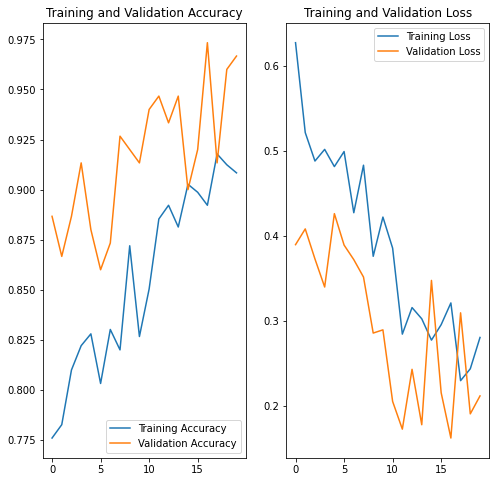

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Using TensorFlow backend.


Saving scissors.jpg to scissors (1).jpg
scissors.jpg
paper


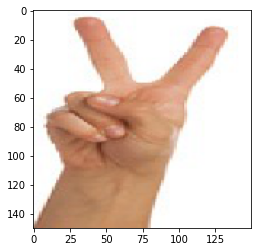

In [19]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')